In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv

In [5]:
# read the retail data
retail= pd.read_csv('online_retail2.csv')

In [6]:
#clean the retail data
retail= retail.drop_duplicates()
retail= retail.dropna()
retail= retail[retail.Quantity > 0]

In [7]:
#calculate Revenue
retail_clean= retail.copy()
retail_clean['Revenue']= retail['Price']* retail['Quantity']
#retail_clean.to_csv('retail_clean.csv')
retail_clean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [8]:
#Group wise Revenue and Qty for ABC Analysis
grouped = retail_clean.groupby('Description').agg(total_sales= ('Quantity',np.sum), 
                               total_revenue= ('Revenue',np.sum)).reset_index()
#grouped.to_csv('for_abc.csv')
grouped

,Description,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,167,1071.25
1,3 STRIPEY MICE FELTCRAFT,662,1241.10
2,4 PURPLE FLOCK DINNER CANDLES,324,495.16
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,ANIMAL STICKERS,385,80.85
...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,4894,3879.98
5279,ZINC TOP 2 DOOR WOODEN SHELF,242,1477.90
5280,ZINC WILLIE WINKIE CANDLE STICK,6166,5127.22
5281,ZINC WIRE KITCHEN ORGANISER,25,156.80


**ABC Analysis (on SALES)**

In [9]:
abc_analysis = inv.ABC(grouped[['Description','total_sales']])

abc_analysis.Category.value_counts()


C    2881
B    1245
A    1157
Name: Category, dtype: int64

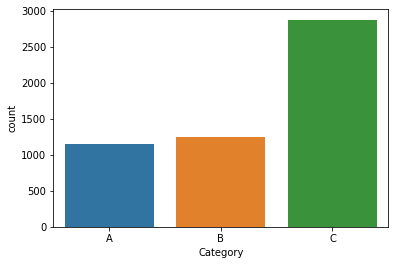

In [11]:
sns.countplot(x='Category', data=abc_analysis)

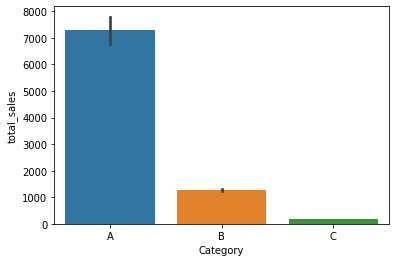

In [12]:
sns.barplot(x= 'Category', y= 'total_sales', data=abc_analysis)

**Multi creteria ABC analyisis (on SALES and REVENUE)**

In [13]:
multi_abc_analysis = inv.productmix(grouped['Description'], grouped['total_sales'], grouped['total_revenue'])
multi_abc_analysis.columns
multi_abc_analysis.product_mix.value_counts()

C_C    2394
A_A     775
B_B     632
C_B     413
B_C     325
A_B     317
B_A     288
C_A      74
A_C      65
Name: product_mix, dtype: int64

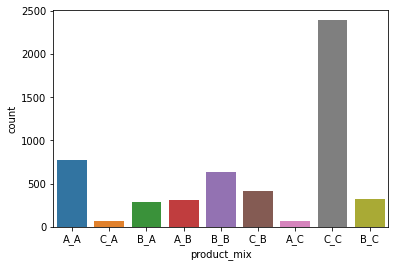

In [14]:
sns.countplot(x='product_mix', data= multi_abc_analysis)

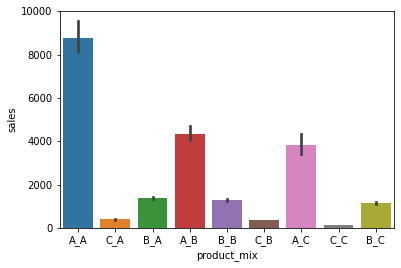

In [15]:
sns.barplot(x='product_mix', y='sales', data= multi_abc_analysis)

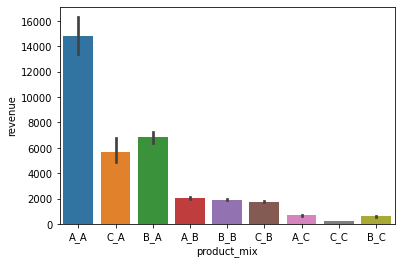

In [16]:
sns.barplot(x='product_mix', y='revenue', data= multi_abc_analysis)

**STORE WISE Multi-creteria ABC (on SALES and REVENUE)**

In [17]:
retail_clean.groupby(['Country','Description']).agg(total_sales=('Quantity',np.sum),
                                                    total_revenue= ('Revenue',np.sum)).reset_index()


by_store = retail_clean.groupby(['Country','Description']).agg(total_sales=('Quantity',np.sum),
                                                    total_revenue= ('Revenue',np.sum)).reset_index()

mix_country = inv.productmix_storelevel(by_store['Description'],
                          by_store['total_sales'], 
                          by_store['total_revenue'],
                          by_store['Country'])

mix_country.columns

/usr/local/lib/python3.7/dist-packages/inventorize3/__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])


Index(['sku', 'sales', 'revenue', 'storeofsku', 'sales_mix',
       'comulative_sales', 'revenue_mix', 'comulative_revenue',
       'sales_category', 'revenue_category', 'product_mix'],
      dtype='object')

In [18]:
product_mix=mix_country.groupby(['storeofsku','product_mix']).count().reset_index().iloc[:,0:3]

product_mix[product_mix.storeofsku=='Australia']

,storeofsku,product_mix,sku
0,Australia,A_A,176
1,Australia,A_B,79
2,Australia,A_C,7
3,Australia,B_A,76
4,Australia,B_B,104
5,Australia,B_C,26
6,Australia,C_A,8
7,Australia,C_B,59
8,Australia,C_C,298
